# Lending Club Analysis Assignment

#### Submitted by: 
#### 1. Kiran Gupta
#### 2. Parama Bhattacharya

In [8]:
# Import all libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Using encoding = "ISO-8859-1" to read the loan data file "loan.csv"
loan_df = pd.read_csv('loan.csv',sep=',',encoding='ISO-8859-1',low_memory=False)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB


#### Assignment Introduction:

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

<h4>Business Objective: </h4>

<h5>Loan accepted:</h5> If the company approves the loan, there are 3 possible scenarios described below:

<h5>Fully paid:</h5> Applicant has fully paid the loan (the principal and the interest rate)

<h5>Current:</h5> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

<h5>Charged-off: </h5> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

<h5>Loan rejected: </h5> The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


#### Data Cleansing

In [10]:
# Sum of missing values per column
loan_df.shape

(39717, 111)

In [11]:
# Find the percentage of missing values in each column
missing_value_columns = loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) >= 100]
missing_value_columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [12]:
# Take a backup of the existing dataframe before performing data cleansing activities
loan_df_backup = loan_df
loan_df_backup.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Dropping of columns with missing values which are not required for the lending club analysis - Part 1

In [13]:
# There are columns having 100 percentage of missing values. This are not required for our analysis and can be dropped.

missing_value_columns = loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) >= 100]
print(missing_value_columns)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [14]:
# There are columns having 100 percentage of missing values. This are not required for our analysis and can be dropped.
loan_df = loan_df.drop(missing_value_columns, axis=1)

# Find the percentage of missing values in each column
missing = round(100 * (loan_df.isnull().sum(axis = 0)/len(loan_df.index)), 2) 
missing[missing > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [15]:
# There is a column next_pymnt_d and mths_since_last_record having 97.13 and 92.99 percentage of missing values. These are not required for our analysis and can be dropped.

loan_df = loan_df.drop('next_pymnt_d', axis = 1)
loan_df = loan_df.drop('mths_since_last_record', axis = 1)

# Find the percentage of missing values in each column
missing_value = round(100 * (loan_df.isnull().sum(axis = 0)/len(loan_df.index)), 2) 
missing_value[missing_value > 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [16]:
# There are 2 columns called "desc" and "mths_since_last_delinq" having 32.58% and 64.66% of missing values
# Check for the values stored in these 2 columns

loan_df.loc[:, ['desc', 'mths_since_last_delinq']].head(5)

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


##### The column "desc" contains Loan description provided by the borrower. We can extract some information into a derived variable based on catchy negative/positive words within this but we will not be using this field for our analysis purpose. The column "mths_since_last_delinq" indicates the number of months since the borrower's last delinquency. We will also drop this column as it would not have any data when a person is applying for the loan. This means that it cannot be used to predict whether a person will fail to payoff the loan.

#### Dropping of rows which are not required for the lending club analysis - Part 2

In [17]:
# We will be dropping of these 2 columns called "desc" and "mths_since_last_delinq" having 32.58% and 64.66% of missing values
loan_df = loan_df.drop('desc', axis = 1)
loan_df = loan_df.drop('mths_since_last_delinq', axis = 1)

In [18]:
# Find the percentage of missing values in each column
missing = round(100 * (loan_df.isnull().sum(axis = 0)/len(loan_df.index)), 2) 
missing[missing >0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

<h5>emp_length: </h5>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
<h5>emp_title: </h5>The job title supplied by the Borrower when applying for the loan.*

In [19]:
# Check if a row is having more than 5 missing values
len(loan_df[loan_df.isnull().sum(axis=1) > 5].index)

0

##### The columns "emp_title" and "emp_length" have 6.19% and 2.71% of missing values. Remove rows having null values.

In [20]:
# Drop rows having null values for columns "emp_title" and "emp_length"

loan_df = loan_df[~loan_df.emp_title.isnull()]
loan_df = loan_df[~loan_df.emp_length.isnull()]

##### The columns "title", "revol_util" and "last_pymnt_d" have .03%, 0.13% and 0.18% of missing values. 
##### Title is pladeholder for the title specified by the borrower' s during loan application
##### Revol util is placeholder for Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
##### last_pymnt_d is placeholder for Last month payment was received
##### Records having null values for these columns can also be deleted.

In [21]:
# Dropping rows having null values for columns "title", "revol_util" and "last_pymnt_d"

loan_df = loan_df[~loan_df.title.isnull()]
loan_df = loan_df[~loan_df.revol_util.isnull()]
loan_df = loan_df[~loan_df.last_pymnt_d.isnull()]

In [22]:
# Find the percentage of missing values in each column
missing = round(100 * (loan_df.isnull().sum(axis = 0)/len(loan_df.index)), 2) 
missing[missing >0]

collections_12_mths_ex_med    0.13
chargeoff_within_12_mths      0.13
pub_rec_bankruptcies          1.76
tax_liens                     0.09
dtype: float64

##### The columns "pub_rec_bankruptcies" have 1.76% of missing values.
##### pub_rec_bankruptcies is pladeholder for Number of public record bankruptcies
##### Records having null values for this column can also be deleted.

In [23]:
# Drop rows having null values for column "pub_rec_bankruptcies"

loan_df = loan_df[~loan_df.pub_rec_bankruptcies.isnull()]

In [24]:
loan_df.shape

(36433, 53)

##### Now our loan dataframe consists of 53 columns and 36433 records with a negligible .13% missing values in the columns "collections_12_mths_ex_med" and "chargeoff_within_12_mths"

In [25]:
# Check the columns available after dropping off unnecessary columns
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

##### Some of the columns whuch are important for our analysis are loan_amount, int_rate, grade, sub_grade, annual_income, home_ownership, purpose. We have to compare the loan status across these independent variables. The objective is to basically identify the variables that is contributing to loan default.

#### Data transaformation and removal of unnecessary columns and data which are not required for our analysis - Part 3

In [26]:
# Check the datatype of each column to see whether any conversion is required or not
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 53 columns):
id                            36433 non-null int64
member_id                     36433 non-null int64
loan_amnt                     36433 non-null int64
funded_amnt                   36433 non-null int64
funded_amnt_inv               36433 non-null float64
term                          36433 non-null object
int_rate                      36433 non-null object
installment                   36433 non-null float64
grade                         36433 non-null object
sub_grade                     36433 non-null object
emp_title                     36433 non-null object
emp_length                    36433 non-null object
home_ownership                36433 non-null object
annual_inc                    36433 non-null float64
verification_status           36433 non-null object
issue_d                       36433 non-null object
loan_status                   36433 non-null object
pymnt_pl

In [27]:
# Revalidate the data types
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 53 columns):
id                            36433 non-null int64
member_id                     36433 non-null int64
loan_amnt                     36433 non-null int64
funded_amnt                   36433 non-null int64
funded_amnt_inv               36433 non-null float64
term                          36433 non-null object
int_rate                      36433 non-null object
installment                   36433 non-null float64
grade                         36433 non-null object
sub_grade                     36433 non-null object
emp_title                     36433 non-null object
emp_length                    36433 non-null object
home_ownership                36433 non-null object
annual_inc                    36433 non-null float64
verification_status           36433 non-null object
issue_d                       36433 non-null object
loan_status                   36433 non-null object
pymnt_pl

In [28]:
# Check for the unique values in some of the key columns

print("unique term : %d"  % len(loan_df.term.unique()))
print("unique int_rate : %d"  % len(loan_df.int_rate.unique()))
print("unique grade : %d"  % len(loan_df.grade.unique()))
print("unique sub_grade : %d"  % len(loan_df.sub_grade.unique()))
print("unique emp_title : %d"  % len(loan_df.emp_title.unique()))
print("unique emp_length : %d"  % len(loan_df.emp_length.unique()))
print("unique home_ownership : %d"  % len(loan_df.home_ownership.unique()))
print("unique pymnt_plan : %d"  % len(loan_df.pymnt_plan.unique()))
print("unique dti : %d"  % len(loan_df.dti.unique()))
print("unique revol_util : %d"  % len(loan_df.revol_util.unique()))
print("unique title : %d"  % len(loan_df.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan_df.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan_df.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan_df.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan_df.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan_df.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan_df.tax_liens.unique()))

unique term : 2
unique int_rate : 334
unique grade : 7
unique sub_grade : 35
unique emp_title : 28207
unique emp_length : 11
unique home_ownership : 4
unique pymnt_plan : 1
unique dti : 2857
unique revol_util : 1082
unique title : 17954
unique last_pymnt_d : 97
unique last_credit_pull_d : 96
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 3
unique tax_liens : 1


##### Columns term, grade, emp_length, pymnt_plan, home_ownership, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies and tax_liens are categorical and values definitely will belong to a range. 

In [29]:
loan_df.term.unique()

array([' 60 months', ' 36 months'], dtype=object)

In [30]:
loan_df.grade.unique()

array(['C', 'B', 'A', 'E', 'D', 'F', 'G'], dtype=object)

In [31]:
loan_df.sub_grade.unique()

array(['C4', 'C1', 'B5', 'A4', 'C5', 'E1', 'C3', 'B1', 'B2', 'D1', 'A1',
       'B3', 'B4', 'D2', 'A5', 'A3', 'A2', 'E4', 'D3', 'C2', 'F2', 'D4',
       'F3', 'E3', 'F4', 'F1', 'D5', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [32]:
loan_df.emp_length.unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [33]:
loan_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [34]:
loan_df.pymnt_plan.unique()

array(['n'], dtype=object)

In [35]:
loan_df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [36]:
loan_df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [37]:
loan_df.pub_rec_bankruptcies.unique()

array([0., 1., 2.])

In [38]:
loan_df.tax_liens.unique()

array([0.])

##### The columns "collections_12_mths_ex_med", "chargeoff_within_12_mths" and "tax_liens" has either value of 0 or nan. These values would not have any impact on the analysis and can be dropped off.

In [39]:
# Dropping of the columns "collections_12_mths_ex_med", "chargeoff_within_12_mths" and "tax_liens"

loan_df = loan_df.drop('collections_12_mths_ex_med', axis = 1)
loan_df = loan_df.drop('chargeoff_within_12_mths', axis = 1)
loan_df = loan_df.drop('tax_liens', axis = 1)

# Find the percentage of missing values in each column having greater than zero
missing = round(100 * (loan_df.isnull().sum(axis = 0)/len(loan_df.index)), 2) 
missing[missing >0]

Series([], dtype: float64)

In [40]:
loan_df.shape

(36433, 50)

##### Now our loan dataframe consists of 50 columns and 36433 records without any missing values.

#### Final cleansing to remove all information except the ones required for analysis - Part 4

In [41]:
loan_df_final = loan_df
loan_df_final.shape

(36433, 50)

In [42]:
loan_df_final.nunique()

id                         36433
member_id                  36433
loan_amnt                    863
funded_amnt                 1024
funded_amnt_inv             7474
term                           2
int_rate                     334
installment                14367
grade                          7
sub_grade                     35
emp_title                  28207
emp_length                    11
home_ownership                 4
annual_inc                  4924
verification_status            3
issue_d                       52
loan_status                    3
pymnt_plan                     1
url                        36433
purpose                       14
title                      17954
zip_code                     806
addr_state                    49
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20790
revol_util

##### There are a few columns having all unique values. This means that these records can be discarded as they do not seem to help us in our analysis and some of the columns contain redundant information.

In [43]:
loan_df_final.initial_list_status.unique()

array(['f'], dtype=object)

In [44]:
loan_df_final.policy_code.unique()

array([1], dtype=int64)

In [45]:
loan_df_final.application_type.unique()

array(['INDIVIDUAL'], dtype=object)

In [46]:
loan_df_final.acc_now_delinq.unique()

array([0], dtype=int64)

In [47]:
loan_df_final.delinq_amnt.unique()

array([0], dtype=int64)

##### There are a few columns having only a single value across all the records This means that these records can be discarded as thye do not seem to help us in our analysis. And some of the columns contain redundant information.

<h5>These columns are: </h5>
##### Id - This is a placeholder for a unique LC assigned ID for the loan listing. This is not required for our analysis.
##### member_id - This is a placeholder for a unique LC assigned ID for the borrower member. This is not required for our analysis.
##### url - This is a placeholder for a URL for the LC page with listing data. This is not required for our analysis.
##### funded_amnt - This is a placeholder for the total amount committed to that loan at that point in time. This is not known while applying for loan and hence can be discarded.
##### funded_amnt_inv - This is a placeholder for the total amount committed by investors for that loan at that point in time. This is not known while applying for loan and hence can be discarded.
##### pymnt_plan - This Indicates if a payment plan has been put in place for the loan. The value is 'n' for entire data set.
##### zip_code - This column is placeholder for the first 3 numbers of the zip code provided by the borrower in the loan application. Redundant with addr_state. This can be discarded as well.
##### initial_list_status - This is a placeholder for the initial listing status of the loan. This is not required for our analysis as value is 'F' for all records.
##### policy_code - This is a placeholder for publicly available policy_code. This is not required for our analysis as value is 1 for all records.
##### application_type - This indicates whether the loan is an individual application or a joint application with two co-borrowers. This is not required for our analysis as the value is 'INDIVIDUAL' for all records.
##### acc_now_delinq - This is a placeholder for the number of accounts on which the borrower is now delinquent. This is not known while applying for loan and hence can be discarded.
##### delinq_amnt - This is a placeholder for the past-due amount owed for the accounts on which the borrower is now delinquent. This is not known while applying for loan and hence can be discarded.


In [48]:
columns_for_removal = ['id','member_id','url','funded_amnt','funded_amnt_inv','pymnt_plan','zip_code',
                      'initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt']
loan_df_final = loan_df_final.drop(columns_for_removal, axis=1)
loan_df_final.nunique()

loan_amnt                    863
term                           2
int_rate                     334
installment                14367
grade                          7
sub_grade                     35
emp_title                  28207
emp_length                    11
home_ownership                 4
annual_inc                  4924
verification_status            3
issue_d                       52
loan_status                    3
purpose                       14
title                      17954
addr_state                    49
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20790
revol_util                  1082
total_acc                     79
out_prncp                   1064
out_prncp_inv               1065
total_pymnt                34802
total_pymnt_inv            34524
total_rec_prncp             7254
total_rec_

In [49]:
loan_df_final.shape

(36433, 38)

#### Data Formatting

In [50]:
# Check for the columns having float datatypes in order to check the number of digits after decomal point
loan_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 38 columns):
loan_amnt                  36433 non-null int64
term                       36433 non-null object
int_rate                   36433 non-null object
installment                36433 non-null float64
grade                      36433 non-null object
sub_grade                  36433 non-null object
emp_title                  36433 non-null object
emp_length                 36433 non-null object
home_ownership             36433 non-null object
annual_inc                 36433 non-null float64
verification_status        36433 non-null object
issue_d                    36433 non-null object
loan_status                36433 non-null object
purpose                    36433 non-null object
title                      36433 non-null object
addr_state                 36433 non-null object
dti                        36433 non-null float64
delinq_2yrs                36433 non-null int64
earliest

In [51]:
loan_df_final.int_rate.value_counts().tail()

12.49%    1
11.22%    1
9.51%     1
10.64%    1
17.54%    1
Name: int_rate, dtype: int64

In [52]:
loan_df_final.installment.value_counts().tail()

336.53    1
863.42    1
615.09    1
375.66    1
595.76    1
Name: installment, dtype: int64

In [53]:
loan_df_final.annual_inc.value_counts().tail()

9840.00     1
39359.00    1
51646.00    1
87700.00    1
46443.36    1
Name: annual_inc, dtype: int64

In [54]:
loan_df_final.dti.value_counts().tail()

27.23    1
25.87    1
26.94    1
0.05     1
29.21    1
Name: dti, dtype: int64

In [55]:
loan_df_final.out_prncp.value_counts().tail()

4464.46    1
2833.43    1
1925.42    1
1023.30    1
914.11     1
Name: out_prncp, dtype: int64

In [56]:
loan_df_final.out_prncp_inv.value_counts().tail()

584.28     1
3547.11    1
2139.90    1
1887.01    1
1228.61    1
Name: out_prncp_inv, dtype: int64

In [57]:
loan_df_final.total_pymnt.value_counts().tail()

5517.160000     1
12878.238670    1
4348.288927     1
8954.809409     1
4608.000000     1
Name: total_pymnt, dtype: int64

##### Round it off to 2 decimal places.

In [58]:
loan_df_final.total_pymnt= round(loan_df_final.total_pymnt,2)

In [59]:
loan_df_final.total_pymnt_inv.value_counts().tail()

25433.98    1
17678.14    1
13785.89    1
12251.54    1
4608.00     1
Name: total_pymnt_inv, dtype: int64

In [60]:
loan_df_final.total_rec_prncp.value_counts().tail()

14749.99    1
2264.11     1
1297.06     1
1922.17     1
6790.87     1
Name: total_rec_prncp, dtype: int64

In [61]:
loan_df_final.total_rec_int.value_counts().tail()

799.15     1
144.49     1
2927.16    1
1241.14    1
1276.31    1
Name: total_rec_int, dtype: int64

In [62]:
loan_df_final.total_rec_late_fee.value_counts().tail()

29.914662    1
23.820000    1
15.610000    1
59.781000    1
14.944409    1
Name: total_rec_late_fee, dtype: int64

##### Rounding it off to 2 decimal places

In [63]:
loan_df_final.total_rec_late_fee = round(loan_df_final.total_rec_late_fee,2)

In [64]:
loan_df_final.recoveries.value_counts().tail()

321.76     1
2563.40    1
1573.14    1
4007.50    1
1842.51    1
Name: recoveries, dtype: int64

In [65]:
loan_df_final.collection_recovery_fee.value_counts().tail()

18.3264     1
198.4078    1
9.6738      1
33.2896     1
93.3678     1
Name: collection_recovery_fee, dtype: int64

##### Rounding off to 2 decimal places

In [66]:
loan_df_final.collection_recovery_fee = round(loan_df_final.collection_recovery_fee, 2)

In [67]:
loan_df_final.last_pymnt_amnt.value_counts().tail()

168.55     1
320.22     1
271.02     1
177.93     1
1544.29    1
Name: last_pymnt_amnt, dtype: int64

In [68]:
loan_df_final.pub_rec_bankruptcies.value_counts().tail()

0.0    34931
1.0     1495
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

##### There are a few columns containing date type data but the datatype is "Object" instead of "Datetime". We need to convert the datatype of all those columns to "Datetime" for further analysis. The following columns need to be changed to "Datetime".
##### issue_d
##### earliest_cr_line
##### last_pymnt_d
##### last_credit_pull_d

In [69]:
# Check the datatype of the columns which contain date information
columns_tobe_converted = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan_df_final[columns_tobe_converted].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36433 non-null object
earliest_cr_line      36433 non-null object
last_pymnt_d          36433 non-null object
last_credit_pull_d    36433 non-null object
dtypes: object(4)
memory usage: 853.9+ KB


In [70]:
#Convert the date type columns to datetime
loan_df_final['issue_d'] = pd.to_datetime(loan_df_final['issue_d'], format='%b-%y')
loan_df_final['earliest_cr_line'] = pd.to_datetime(loan_df_final['earliest_cr_line'], format='%b-%y')
loan_df_final['last_pymnt_d'] = pd.to_datetime(loan_df_final['last_pymnt_d'], format='%b-%y')
loan_df_final['last_credit_pull_d'] = pd.to_datetime(loan_df_final['last_credit_pull_d'], format='%b-%y')

In [71]:
# Check the datatype of the columns which contain date information
columns_tobe_converted = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
loan_df_final[columns_tobe_converted].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
issue_d               36433 non-null datetime64[ns]
earliest_cr_line      36433 non-null datetime64[ns]
last_pymnt_d          36433 non-null datetime64[ns]
last_credit_pull_d    36433 non-null datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


##### The int_rate column contains floating values but the datatype is "Object" instead of "Float". We need to convert the datatype to float and strip off the %age at the end.

In [72]:
# Convert "int_rate" datatype from object to numeric

loan_df_final['int_rate'] = loan_df_final['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan_df_final['int_rate']

1        15.27
3        13.49
4        12.69
5         7.90
6        15.96
7        18.64
9        12.69
10       14.65
11       12.69
12       13.49
13        9.91
14       10.65
15       16.29
16       15.27
17        6.03
18       11.71
19        6.03
20       15.27
21       12.42
22       11.71
23       11.71
24       11.71
25        9.91
27       16.77
28       11.71
29       11.71
31        7.90
32       15.96
33        8.90
34       15.96
         ...  
38995    10.39
38996     8.63
38997    12.29
38998    11.97
38999     9.76
39000     9.45
39001    11.34
39002    12.29
39003    10.39
39013     9.76
39052    13.24
39084    11.97
39138    10.71
39216    12.92
39220     9.76
39251    13.55
39288    10.46
39291    13.93
39346    10.78
39348     9.51
39362    10.78
39425    12.36
39430    13.30
39433     9.83
39475     9.01
39551    10.91
39562    10.28
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 36433, dtype: float64

##### The revol_util column contains floating values but the datatype is "Object" instead of "Float". We need to convert the datatype to float and strip off the %age at the end.

In [73]:
# Convert "revol_util" datatype from object to numeric

loan_df_final['revol_util'] = loan_df_final['revol_util'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [74]:
loan_df_final[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
int_rate      36433 non-null float64
revol_util    36433 non-null float64
dtypes: float64(2)
memory usage: 853.9 KB


##### The emp_length column is of utmost importance as it contains the employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. Let us have a look at it.

In [75]:
loan_df_final['emp_length'].value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

##### Let us fetch the actual number of years from the string and convert it into numeric from object datatype

In [76]:
loan_df_final.emp_length[loan_df_final.emp_length.str.contains('< 1 year')] = '0 years'

In [77]:
loan_df_final.emp_length[loan_df_final.emp_length.str.contains('10')] = '10 years'

In [78]:
loan_df_final.emp_length.value_counts()

10 years    8407
2 years     4178
0 years     4052
3 years     3914
4 years     3297
5 years     3129
1 year      3026
6 years     2121
7 years     1697
8 years     1405
9 years     1207
Name: emp_length, dtype: int64

In [79]:
loan_df_final.emp_length = loan_df_final.emp_length.str.strip('years')

In [80]:
loan_df_final.emp_length = loan_df_final.emp_length.astype(int)

##### The term column is used to store the number of payments on the loan. Values are in months and can be either 36 or 60. But if you see the actual data stored against this column, it is eitehr "36 months" or "60 months".

In [81]:
loan_df_final.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

##### Let us strip off the "months" from the end

In [82]:
loan_df_final['term'] = loan_df_final.term.str.strip('months')

In [83]:
loan_df_final.term.value_counts()

 36     26377
 60     10056
Name: term, dtype: int64

##### The column "earliest_cr_line" contains the month the borrower's earliest reported credit line was opened.

In [84]:
loan_df_final.earliest_cr_line.value_counts()

1998-11-01    353
1999-10-01    348
1998-12-01    327
2000-10-01    320
2000-11-01    301
1999-11-01    298
1997-12-01    295
1997-11-01    282
1998-10-01    281
2000-09-01    278
1999-12-01    273
1995-12-01    268
2000-01-01    266
2000-12-01    264
2000-07-01    260
1996-12-01    252
1996-11-01    251
2000-08-01    251
2001-09-01    250
2002-10-01    249
2001-10-01    248
2000-05-01    242
2000-04-01    242
1999-09-01    241
1998-08-01    237
1999-08-01    232
2003-10-01    231
2001-01-01    229
1999-01-01    229
1997-10-01    226
             ... 
2068-10-01      1
2067-06-01      1
2067-07-01      1
2046-01-01      1
2065-02-01      1
1972-02-01      1
1969-04-01      1
2066-12-01      1
1971-06-01      1
2067-11-01      1
1974-10-01      1
2063-10-01      1
1973-02-01      1
2067-05-01      1
2068-12-01      1
2065-12-01      1
2068-06-01      1
2063-03-01      1
2066-02-01      1
2067-02-01      1
1972-11-01      1
2056-09-01      1
1969-06-01      1
2066-04-01      1
1971-03-01

##### Let us split the date column into earliest_cr_line_month and earliest_cr_line_year

In [85]:
# Splitting the datecolumn into month and year respectively
loan_df_final['earliest_cr_line_month'] = loan_df_final['earliest_cr_line'].dt.month
loan_df_final['earliest_cr_line_year'] = loan_df_final['earliest_cr_line'].dt.year

##### This should contain data from 2007 till 2011. Let us validate whether it has any records which is beyond these 2 threshold values

In [86]:
# Check for number of records which are before 2007
len(loan_df_final[loan_df_final['earliest_cr_line_year'] < 2007 ])

35571

In [87]:
# Check for number of records which are after 2011
len(loan_df_final[loan_df_final['earliest_cr_line_year'] > 2011 ])

50

##### Let us see for which all years the information is stored after 2011

In [88]:
# Fetch the unique years beyond 2011 for which the column "earliest_cr_line_year" is having information
loan_df_final[loan_df_final['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

##### This is wrong information as it seems that 2-digit year have been wrongly interpreted as 21st centure instead of 20th century. Need to fix this by deducting 100 years from each one of them

In [89]:
# Deduct 100 years from all those years which are beyond 2011
loan_df_final.loc[loan_df_final['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan_df_final['earliest_cr_line_year'] - 100

In [90]:
# Revalidate the number of records which are after 2011
len(loan_df_final[loan_df_final['earliest_cr_line_year'] > 2011 ])

0

##### The column "issue_d" contains the month in which the loan was funded.

In [91]:
loan_df_final.issue_d.value_counts()

2011-12-01    2126
2011-11-01    2048
2011-10-01    1951
2011-09-01    1925
2011-08-01    1810
2011-07-01    1732
2011-06-01    1702
2011-05-01    1575
2011-04-01    1463
2011-03-01    1339
2011-01-01    1299
2011-02-01    1186
2010-12-01    1174
2010-11-01    1064
2010-07-01    1062
2010-10-01    1046
2010-09-01    1030
2010-08-01    1030
2010-06-01     965
2010-05-01     870
2010-04-01     786
2010-03-01     678
2010-02-01     575
2009-11-01     534
2010-01-01     515
2009-12-01     513
2009-10-01     506
2009-09-01     437
2009-08-01     398
2009-07-01     361
2009-06-01     341
2009-05-01     307
2009-04-01     278
2009-03-01     267
2009-02-01     253
2009-01-01     228
2008-12-01     214
2008-11-01     175
2008-04-01     145
2008-03-01     112
2008-10-01      93
2008-07-01      77
2008-05-01      69
2008-08-01      66
2008-06-01      61
2008-09-01      29
2008-02-01       6
2008-01-01       6
2007-08-01       2
2007-12-01       2
2007-11-01       1
2007-10-01       1
Name: issue_

##### Let us split the date column into "issue_d_month" and "issue_d_year"

In [92]:
loan_df_final['issue_d_month'] = loan_df_final['issue_d'].dt.month
loan_df_final['issue_d_year'] = loan_df_final['issue_d'].dt.year

#### Data Analysis - Univariate analysis across categorical variables

In [93]:
##Copy the final file in one CSV Dataset
loan_df_final.to_csv('master_file.csv', encoding='utf-8', index=False)

In [94]:
loan_df_univ = loan_df_final

In [174]:
loan_df_final.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [175]:
# Discarding all rows except the ones for which the loan_status is either a)Fully Paid b)Charged Off
loan_df_final = loan_df_final[(loan_df_final['loan_status'] == 'Fully Paid') | (loan_df_final['loan_status'] == 'Charged Off')]

##### Most of the loans are "Fully Paid". The "Current" ones are neither fully paid nor defaulted. So we can get rid of this particular loan_status. Let us reset the values to 0 and 1.
##### 0: Fully Paid
##### 1: Charged Off

In [176]:
loan_df_univ['loan_status'].value_counts()

0    30424
1     6009
Name: loan_status, dtype: int64

#### Univariate Analysis

In [177]:
#Function to show percentage in graph
def percentage(ax):
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        height = round(height*100,2)
        ax.annotate('{}'.format(height), (x, y + height + 0.01))

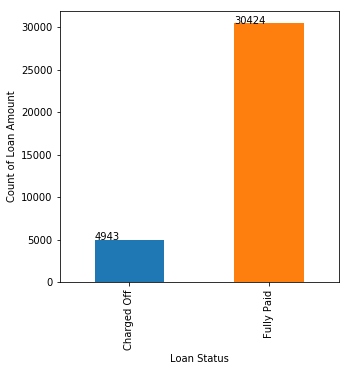

In [178]:
plt.figure(figsize=(5,5))
ax = loan_df_final.groupby('loan_status').loan_amnt.count().plot.bar()
for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(format(height), (x, y + height + 0.01))
plt.xlabel('Loan Status')
plt.ylabel('Count of Loan Amount')
plt.show()

In [180]:
# Find the % of Charged off Loan
Charged_off_loan =loan_df_univ.loc[loan_df_univ['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(loan_df_univ)
round(Charged_off_loan,2)

TypeError: invalid type comparison

##### From the above graph it is clear that the around 5k Charged off loan and fully Paid loan is around 30k

Charge-off Loan: A charge-off is a debt that is deemed unlikely to be collected by the credit
</br>Fully Paid Loan: The return of funds happens through periodic payments which include both principal and interest.

In [181]:
round(100* loan_df_univ.groupby('loan_status').total_pymnt.sum()/ loan_df_univ.groupby('loan_status').loan_amnt.sum(),2)

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [182]:
#Function to show percentage in graph
def percentage(ax):
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        height = round(height,2)
        ax.annotate('{}%'.format(height), (x, y + height + 0.01))


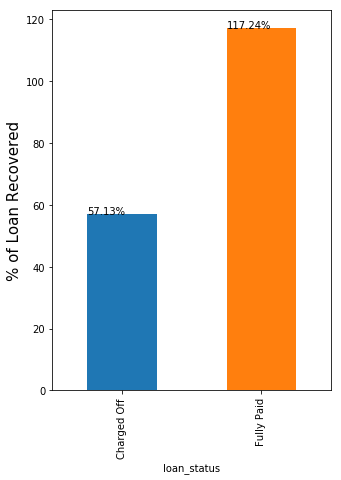

In [183]:
plt.figure(figsize=(5,7))
ax = (100* loan_df_final.groupby('loan_status').total_pymnt.sum()/ loan_df_final.groupby('loan_status').loan_amnt.sum()).plot.bar()
plt.ylabel('% of Loan Recovered', fontsize = 15)
percentage(ax)
plt.show()

#### From graph It is clear that 57.13% of loan Recovered.

In [104]:
loan_df_univ.groupby('loan_status').total_pymnt.sum() * 100 / loan_df_univ.groupby('loan_status').loan_amnt.sum()

loan_status
Charged Off     57.127471
Current        128.363180
Fully Paid     117.242294
dtype: float64

##### Let us plot barplots to see default rate across variable "grade"

In [105]:
# Resetting the values, Fully Paid with '0' and Charged Off with "1"
loan_df_univ['loan_status'] = loan_df_univ['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)
loan_df_univ.to_csv('master_file.csv')

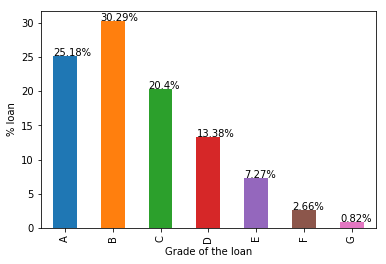

In [106]:
# Plot the default rate against "grade" variable of the dataframe
#See the pattern of loan status vs grade
ax = (100 * loan_df_univ.groupby('grade').loan_status.count()/loan_df_univ.loan_status.count()).plot.bar()
percentage(ax)
plt.xlabel('Grade of the loan')
plt.ylabel('% loan')
plt.show()

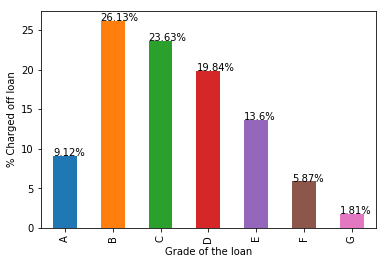

In [107]:
#Draw the loan patter of default
ax = (loan_df_univ[loan_df_univ.loan_status == 1].groupby('grade').loan_status.sum()/loan_df_univ[loan_df_univ.loan_status==1].loan_status.sum() * 100).plot.bar()
percentage(ax)
plt.xlabel('Grade of the loan')
plt.ylabel('% Charged off loan')
plt.show()

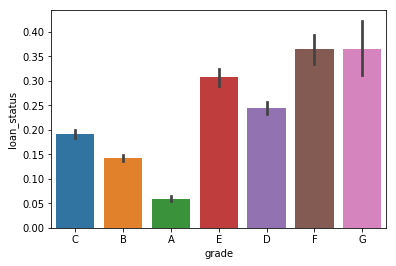

In [188]:
ax = sns.barplot(x='grade', y='loan_status', data = loan_df_univ)
plt.show()

##### It is evident from the plot that as the grade of loan goes from A to G, the default rate increases. This is expected because the grade is decided by Lending Club based on the risk nature of the loan.

##### Let us plot barplots to see default rate across variable "sub-grade"

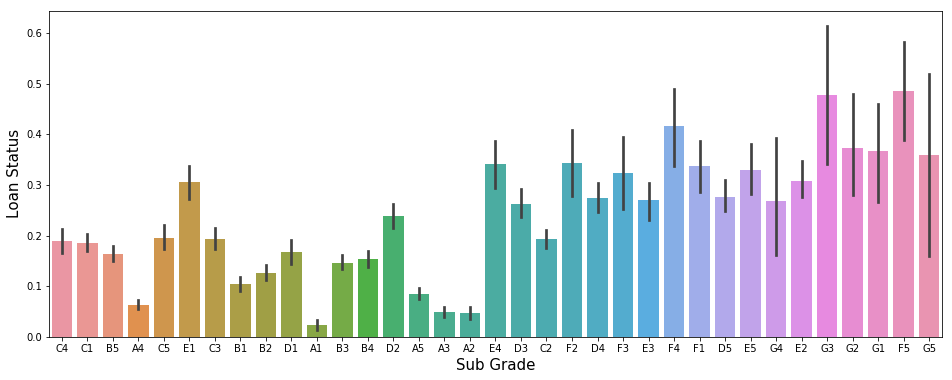

In [109]:
# Plot the default rate against "sub-grade" variable of the dataframe
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_status', data=loan_df_univ)
plt.xlabel('Sub Grade', fontsize = 15)
plt.ylabel('Loan Status', fontsize = 15)
plt.show()

##### It is evident from the plot that as the sub_grade of loan goes from A1 to A2, A2 to A3, A3 to A4 and A4 to A5, the default rate increases. This is expected because the sub_grade is also decided by Lending Club based on the riskiness of the loan.

##### Let us plot barplots to see default rate across variable "term"

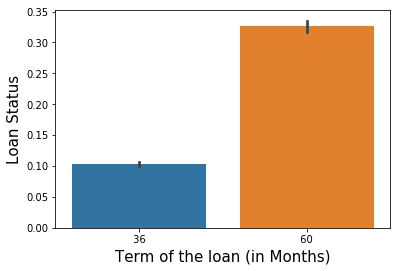

In [110]:
# Plot the default rate against "term" variable of the dataframe
sns.barplot(x='term', y='loan_status', data=loan_df_univ)
plt.xlabel('Term of the loan (in Months)', fontsize = 15)
plt.ylabel('Loan Status', fontsize = 15)
plt.show()

##### It clearly shows that loan taken for a longer term which is 60 months is a stronger candidate for default.

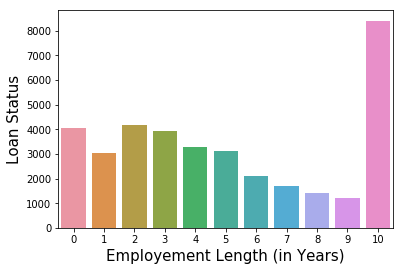

In [111]:
# Plot the default rate against "emp_length" variable of the dataframe
sns.countplot(x='emp_length', data=loan_df_univ, order=sorted(loan_df_univ.emp_length.unique()))
plt.xlabel('Employement Length (in Years)', fontsize = 15)
plt.ylabel('Loan Status', fontsize = 15)
plt.show()

Most of the people having employement length greater than 10 years.

##### Let us plot barplots to see default rate across variable "home_ownership"

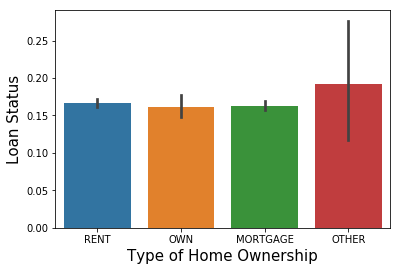

In [112]:
# Plot the default rate against "home_ownership" variable of the dataframe
sns.barplot(x='home_ownership', y='loan_status', data=loan_df_univ)
plt.xlabel('Type of Home Ownership', fontsize = 15)
plt.ylabel('Loan Status', fontsize = 15)
plt.show()

##### This does not give any clear indication as its same across all differnt types

##### Purpose of the loan clearly indicates as to why the borrower has applied for the loan. Let us see which of the loan types has greatest risk of being defaulted

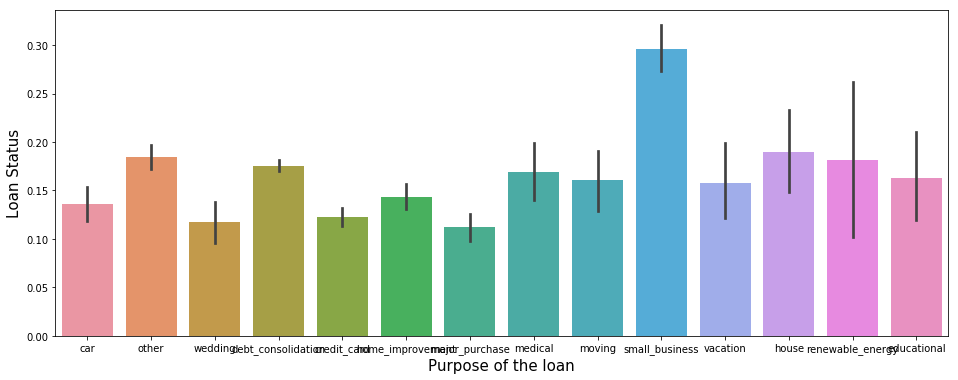

In [113]:
# Plot the default rate against "purpose" variable of the dataframe
plt.figure(figsize=(16, 6))
sns.barplot(x='purpose', y='loan_status', data=loan_df_univ)
plt.xlabel('Purpose of the loan', fontsize = 15)
plt.ylabel('Loan Status', fontsize = 15)
plt.show()

##### From the above graph, we can see that the following "purpose" are the ones which is strongest contender of being defaulted
##### 1. small_business
##### 2. renewable_energy
##### 3. educational

##### Let us plot barplots to see default rate across variable "verification_status"

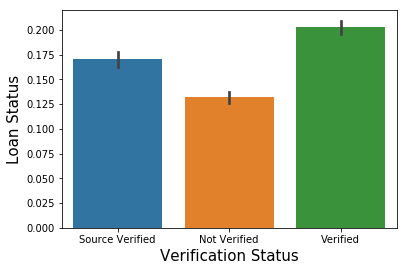

In [114]:
# Plot the default rate against "verification_status" variable of the dataframe
sns.barplot(x='verification_status', y='loan_status', data=loan_df_univ)
plt.xlabel('Verification Status', fontsize = 15)
plt.ylabel('Loan Status', fontsize = 15)
plt.show()

##### It clearly indicates that Verified loans default more than non-verfied loans

##### Now let us see what is the relation between default loans and year it was issued

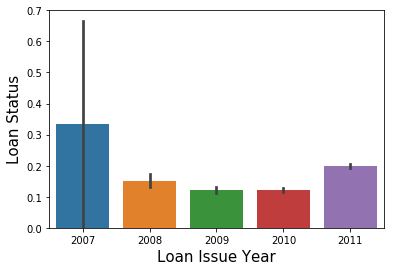

In [115]:
# Plot the default rate against "issue_d_year" variable of the dataframe
sns.barplot(x='issue_d_year', y='loan_status', data=loan_df_univ)
plt.xlabel('Loan Issue Year', fontsize = 15)
plt.ylabel('Loan Status', fontsize = 15)
plt.show()

##### Loans issued in 2007 has the highest default rate. The default rate was decreasing after that but again started increasing in 2011

##### Now let us compare the default rate with the issuing month

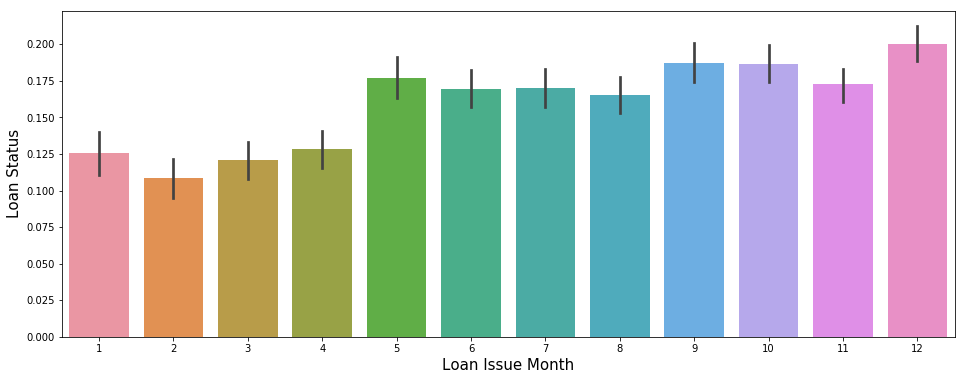

In [116]:
# Plot the default rate against "issue_d_month" variable of the dataframe
plt.figure(figsize=(16, 6))
sns.barplot(x='issue_d_month', y='loan_status', data=loan_df_univ)
plt.xlabel('Loan Issue Month', fontsize = 15)
plt.ylabel('Loan Status', fontsize = 15)
plt.show()

##### Not much variation across months. Loans issued in May and December has higher default rate

#### Data Analysis - Univariate analysis across continuous variables

##### Let us now analyse as to how the default rate varies across continuous variables. This would require us to bin the variables into discreate categories.

##### Let us first see the plot for loan_amount

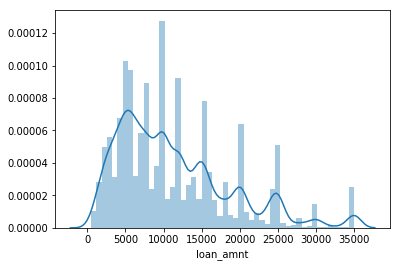

In [117]:
# Plot the default rate against "loan_amnt" variable of the dataframe
sns.distplot(loan_df_univ['loan_amnt'])
plt.show()

In [118]:
loan_df_final.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


#### Observation:
1. Mean of the Charged off loan amount is around 12K which is 2k higher than Paid-off Loan.
2. Most of the loan approved was around 15k

In [119]:
#Create a derived variable to see the loan status distribution vs loan amount
loan_df_univ['loan_amnt_dis'] = pd.cut(loan_df_univ['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

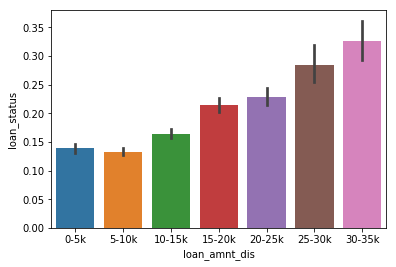

In [120]:
sns.barplot(x='loan_amnt_dis', y='loan_status', data=loan_df_univ)

##### Let us categorize the loan_amnt into below categories:
###### **1. < 5000: Below 5000**
###### **2. Between 5000 and 15000: 5000 - 15000**
###### **3. Between 15000 and 25000: 15000 - 25000**
###### **4. > 25000: Above 25000**

In [121]:
# Categorizing loan amount
def loan_amount(n):
    if n < 5000:
        return '< 5000'
    elif n >=5000 and n < 15000:
        return '5000-15000'
    elif n >= 15000 and n < 25000:
        return '15000-25000'
    else:
        return '> 25000'

loan_df_univ['loan_amnt'] = loan_df_univ['loan_amnt'].apply(lambda x: loan_amount(x))

In [122]:
loan_df_univ['loan_amnt'].value_counts()

5000-15000     19461
15000-25000     7530
< 5000          6678
> 25000         2764
Name: loan_amnt, dtype: int64

##### Let us compare the default rate with the loan_amnt

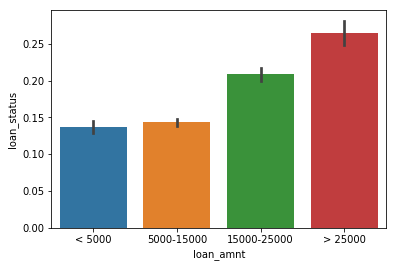

In [123]:
# Plot the default rate against "loan_amnt" variable of the dataframe
sns.barplot(x='loan_amnt', y='loan_status', data=loan_df_univ)
plt.show()

##### It is clear from the plot that higher the value of "loan_amnt", greater is the risk of defaulting

##### Let us categorize the Interest Rate[int_rate] into below categories:
##### 1. <= 10: Low
##### 2. Between 10 and 15: Medium
##### 3. > 15: High

In [124]:
# categorizing interest rate
def interest_rates_calc(n):
    if n <= 10:
        return 'Below 10'
    elif n > 10 and n <= 15:
        return '10-15'
    else:
        return 'Above 15'

loan_df_univ['int_rate'] = loan_df_univ['int_rate'].apply(lambda x: interest_rates_calc(x))

##### Let us compare default rate with interest rates

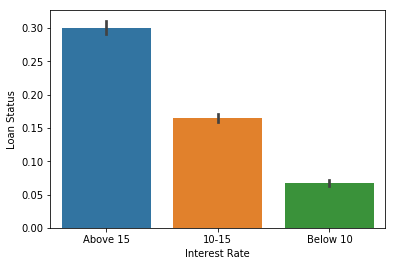

In [125]:
# Plot the default rate against "int_rate" variable of the dataframe
sns.barplot(x='int_rate', y='loan_status', data=loan_df_univ)
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.show()

##### It clearly indicates that loans having higher rates of interest have a high risk of defaulting more

##### Let us compare the debt to income ratio with default rate

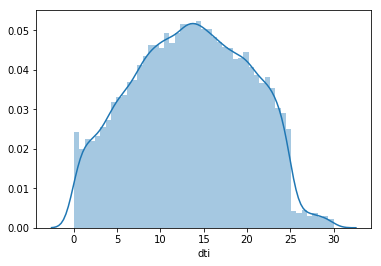

In [126]:
sns.distplot(loan_df_univ['dti'])
plt.show()

##### As we can see above that the debt to income ratio can be broadly bategorized as below
###### **1. Less than 10: Below 10**
###### **2. Between 10 and 20: 10-20**
###### **3. Above 20: Above 20**

In [127]:
# categorizing debt to income ratio
def dti_calc(n):
    if n <= 10:
        return 'Below 10'
    elif n > 10 and n <=20:
        return '10-20'
    else:
        return 'Above 20'   

loan_df_univ['dti'] = loan_df_univ['dti'].apply(lambda x: dti_calc(x))

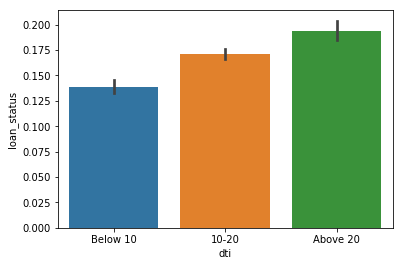

In [128]:
# Plot the default rate against "dti" variable of the dataframe
sns.barplot(x='dti', y='loan_status', data=loan_df_univ)
plt.show()

##### It is clearly visible that higher debt to ratio values have higher risk of defaulting

##### Let us find the relation between installment and defaulting

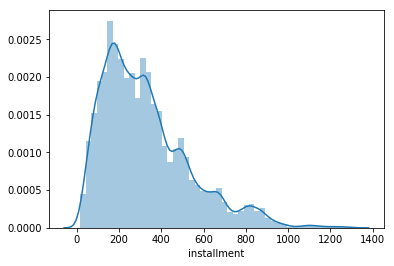

In [129]:
sns.distplot(loan_df_univ['installment'])
plt.show()

##### Let us categorize installment as below:
###### **1. Less than 200: Below 200**
###### **2. Between 200 and 400: 200-400**
###### **3. Between 400 and 600: 400-600**
###### **4. Above 600: Above 600**

In [130]:
# categorizing installment
def installment_amount_calc(n):
    if n <= 200:
        return 'Below 200'
    elif n > 200 and n <=400:
        return '200-400'
    elif n > 400 and n <=600:
        return '400-600'
    else:
        return 'Above 600'
    
loan_df_univ['installment'] = loan_df_univ['installment'].apply(lambda x: installment_amount_calc(x))

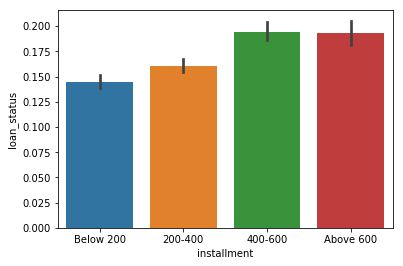

In [131]:
# Plot the default rate against "installment" variable of the dataframe
sns.barplot(x='installment', y='loan_status', data=loan_df_univ)
plt.show()

##### Installment amount hgher than 400 has high risk of defaulting

##### Let us now compare the Employee experience with defaulting

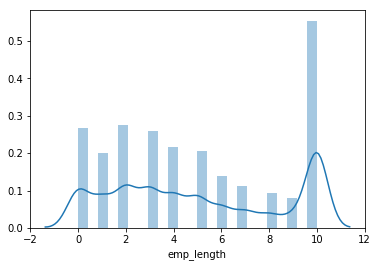

In [132]:
sns.distplot(loan_df_univ['emp_length'])
plt.show()

##### Let us categorize the employee years as below:
##### 1. <= 1 Years: 'Entry Level'
##### 2. Between 1 and 3 Years: 'Junior Level'
##### 3. Between 3 and 7 Years: 'Senior Level'
##### 4. Above 7 Years: 'Experinced Level'

In [133]:
# categorizing employee experience
def employee_exp(n):
    if n <= 1:
        return 'Entry Level'
    elif n > 1 and n <=3:
        return 'Junior Level'
    elif n > 3 and n <=7:
        return 'Senior Level'
    else:
        return 'Experienced'

loan_df_univ['emp_length'] = loan_df_univ['emp_length'].apply(lambda x: employee_exp(x))

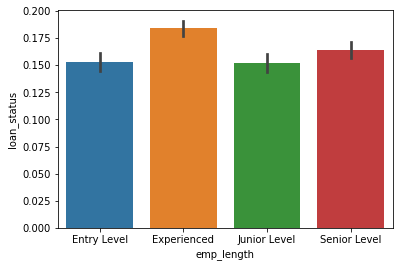

In [134]:
# Plot the default rate against "emp_length" variable of the dataframe
sns.barplot(x='emp_length', y='loan_status', data=loan_df_univ)
plt.show()

##### Not much of a difference with employee experience

#### Bivariate Analysis

In [135]:
loan_df_biv = loan_df_final

In [136]:
# Discarding all rows except the ones for which the loan_status is either a)Fully Paid b)Charged Off
loan_df_biv = loan_df_biv[(loan_df_biv['loan_status'] == 'Fully Paid') | (loan_df_biv['loan_status'] == 'Charged Off')]

# Resetting the values, Fully Paid with '0' and Charged Off with "1"
loan_df_biv['loan_status'] = loan_df_biv['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

In [137]:
loan_df_biv.annual_inc.describe()

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### Annual Income varies from 4000 to 6000000

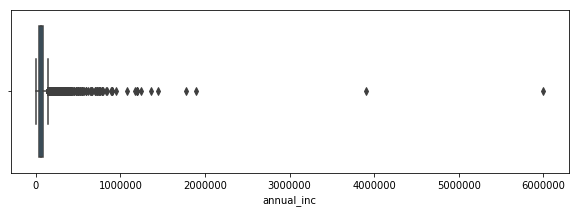

In [138]:
plt.figure(figsize=(10, 3))

sns.boxplot(x='annual_inc', data=loan_df_biv)

##### **Loan Amount versus Annual Income**

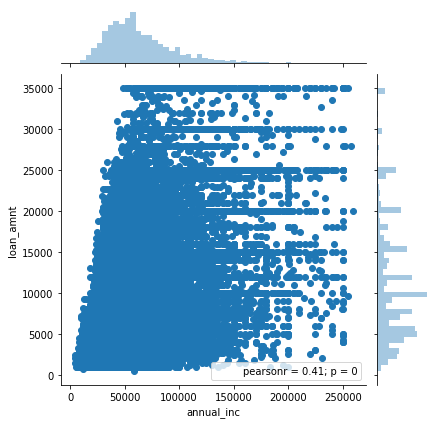

In [139]:
sns.jointplot('annual_inc', 'loan_amnt', loan_df_biv.loc[loan_df_biv['annual_inc'] < 260000])
plt.show()

##### **Observation**
###### **It is evident that people having lesser salary, less than 50000 and who have taken loan of 25000 and higher has a higher chance of defaulting**

##### Loan Amount versus Grade

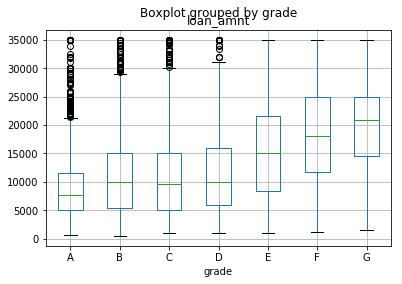

In [140]:
loan_df_biv.boxplot(column='loan_amnt', by='grade')
plt.show()

###### **Observation**
###### **The grade assigned increases in the sequence A to B, B to C, C to D, D to E, E to F, F to G as the loan amount increases. Or we can say that grade actually decreases with the increase in the loan amount**

#### Annual Income versus Grade

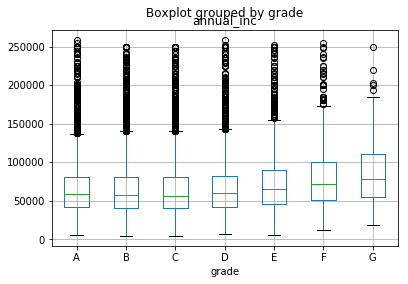

In [141]:
loan_df_biv.loc[loan_df_biv['annual_inc'] < 260000].boxplot(column='annual_inc', by='grade')
plt.show()

#### Interest Rate versus Sub Grade

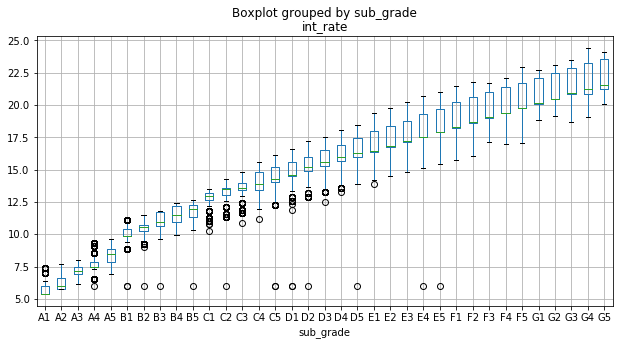

In [142]:
loan_df_biv.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

##### **Observation**
###### **Interest Rate increases as the sub grade decreases. The lesser the sub_gde, higher is the int_rate**

##### Interest Rate versus Loan Status

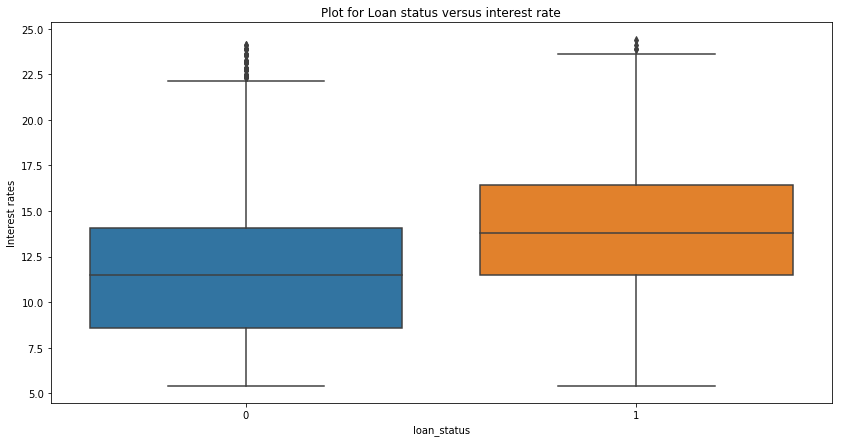

In [143]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
sns.boxplot(y='int_rate', x='loan_status', data=loan_df_biv)
plt.title('Plot for Loan status versus interest rate')
plt.ylabel('Interest rates')
plt.show()

##### **Observation**
###### **Higher interest rates are likely to be charged off**

##### Revol Util versus Interest Rate

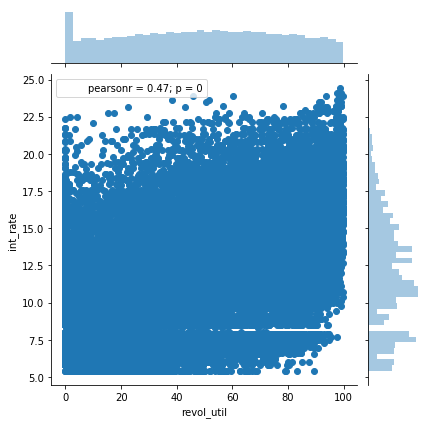

In [144]:
sns.jointplot('revol_util', 'int_rate', loan_df_biv)

##### revol util versus Grade

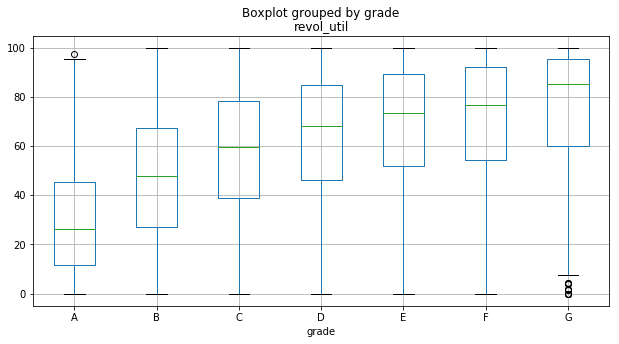

In [145]:
plt.figure(figsize=(20,5))
loan_df_biv.boxplot(column='revol_util', by='grade',figsize=(10,5))
plt.show()

##### Revol util versus Loan Amount

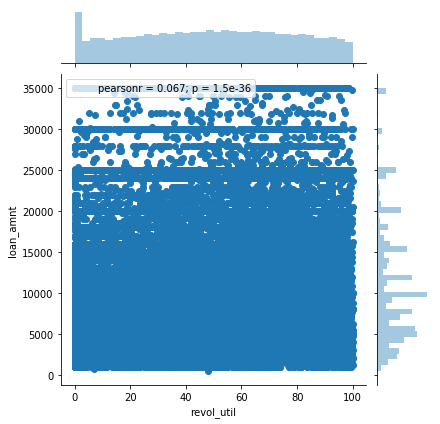

In [146]:
sns.jointplot('revol_util', 'loan_amnt',loan_df_biv)

##### Loan Amount versus Interest Rate

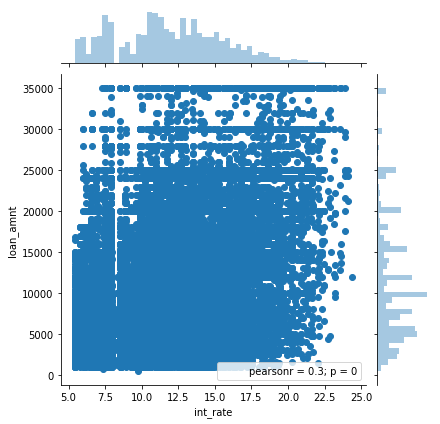

In [147]:
sns.jointplot('int_rate', 'loan_amnt', loan_df_biv)

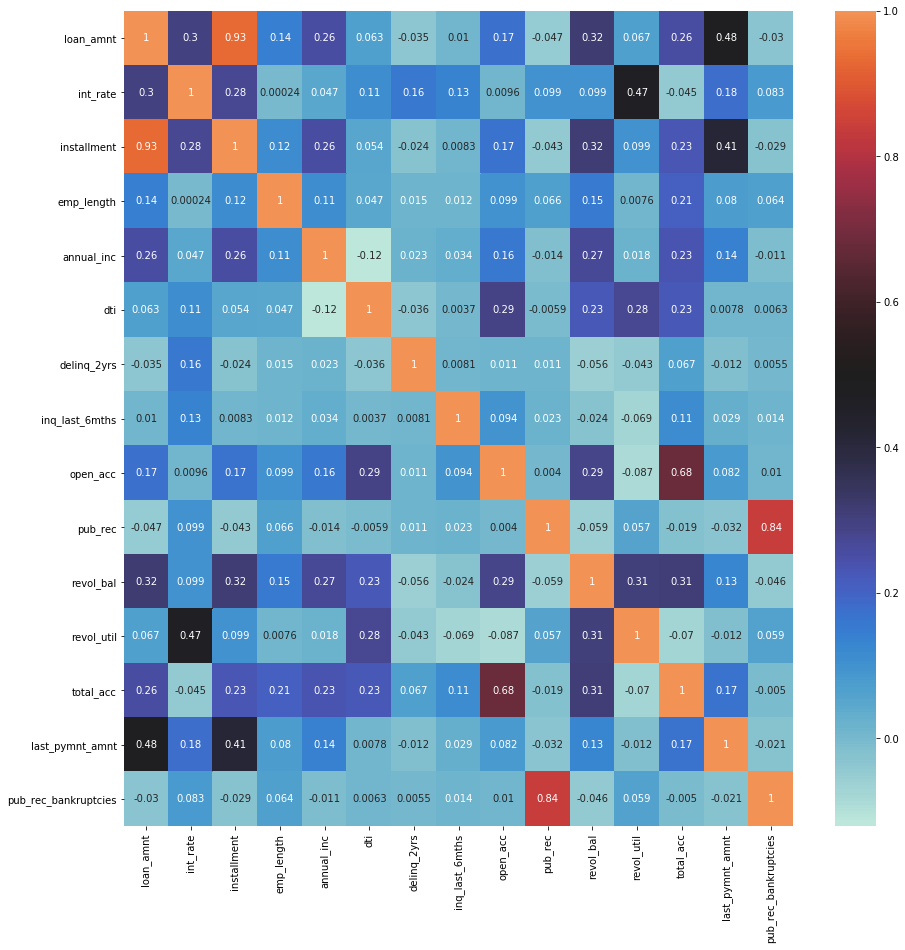

In [148]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = loan_df_biv[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

##### Observation:
##### 1.Loan amount is highly correlated with last payment amount [.45]
##### 2.Interest Rate is highly correlated to revol_util [.47].
##### 3.Loan amount is correlated to Revol Bal [.32]. This means that higher loans are given to riskier borrowers and is a great risk for the company.